In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gstn-hackathon/Y_Train_Data_Target.csv
/kaggle/input/gstn-hackathon/X_Test_Data_Input.csv
/kaggle/input/gstn-hackathon/X_Train_Data_Input.csv
/kaggle/input/gstn-hackathon/Y_Test_Data_Target.csv


In [10]:
X = pd.read_csv('/kaggle/input/gstn-hackathon/X_Train_Data_Input.csv')
Y = pd.read_csv('/kaggle/input/gstn-hackathon/Y_Train_Data_Target.csv')

df_train = pd.concat([X, Y], axis=1)

In [11]:
df_train = df_train.drop(columns='ID', axis=1)

In [13]:
X = pd.read_csv('/kaggle/input/gstn-hackathon/X_Train_Data_Input.csv')
Y = pd.read_csv('/kaggle/input/gstn-hackathon/Y_Train_Data_Target.csv')
X_test = pd.read_csv('/kaggle/input/gstn-hackathon/X_Test_Data_Input.csv')
Y_test = pd.read_csv('/kaggle/input/gstn-hackathon/Y_Test_Data_Target.csv')
df_test = pd.concat([X_test,Y_test], axis=1)
df_test = df_test.drop(columns='ID', axis=1)

In [12]:
df_train.head()

,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,...,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,target
0,2.0,2495,3726.0,0.678139,0.701403,-0.007468,0.434190,-0.015603,0.606265,NaN,...,0,0.001351,0.00339,0.0,0,0.0,0,0,0,0
1,0.0,2495,3454.0,0.452580,0.701403,-0.007468,1.554998,-0.015574,0.329946,NaN,...,0,0.001351,0.00339,0.0,0,0.0,0,0,0,0
2,2.0,2495,4543.0,-1.577453,-1.429540,-0.007469,-0.407939,-0.015607,-0.774979,NaN,...,1,0.001351,0.00339,0.0,0,0.0,0,0,0,0
3,0.0,211,59.0,NaN,NaN,NaN,-0.407939,-0.015607,-0.774979,NaN,...,0,NaN,0.00339,0.0,0,1.0,0,0,0,1
4,0.0,718,950.0,-2.028572,-1.855728,NaN,-0.407939,-0.015607,-0.774979,NaN,...,0,NaN,0.00339,0.0,0,0.0,0,0,0,0


In [9]:
df_test.isnull().sum()

Column0          2
Column1          0
Column2          0
Column3      42234
Column4      42710
Column5      55659
Column6       1234
Column7          0
Column8       1234
Column9     243853
Column10         0
Column11         0
Column12         0
Column13         0
Column14    121679
Column15      5485
Column16         0
Column17         0
Column18         0
Column19         0
Column20         0
Column21         0
target           0
dtype: int64

In [8]:
df_train.isnull().sum()

,0
Column0,9
Column1,0
Column2,0
Column3,126303
Column4,127710
Column5,167180
Column6,3850
Column7,0
Column8,3850
Column9,732137


<Axes: >

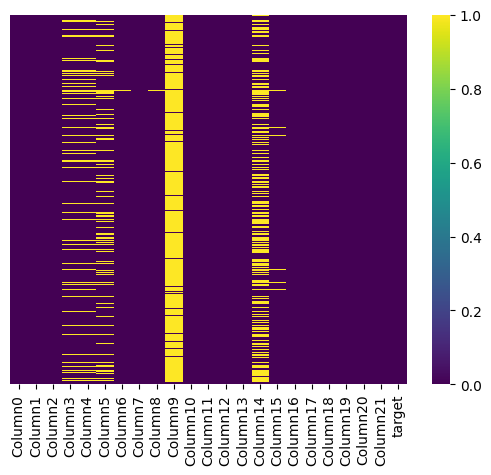

In [9]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [16]:
df_train = df_train.drop(columns=['Column9'],axis=1)

In [17]:
df_test = df_test.drop(columns=['Column9'],axis=1)

<Axes: >

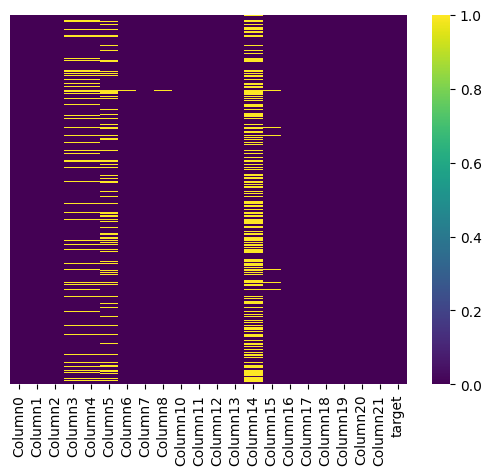

In [10]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [33]:
df_train['Column17'].value_counts()

,count
Column17,
0,766697
1,3297
2,1947
3,1472
4,1219
...,...
161,1
123,1
89,1


# data is imbalance and many nan value

In [18]:
columns = df_train.columns

In [19]:
for column in columns:
    print(column)
    print(df_train[column].unique())

Column0
[ 2.  0.  1.  5.  6.  7.  4.  8. 15.  3.  9. 11. 12. 14. 10. 13. 16. 17.
 18. nan]
Column1
[ 2495   211   718 ...   -58  -921 -1080]
Column2
[3726. 3454. 4543. ... 9399. 9871. 8955.]
Column3
[ 6.78139438e-01  4.52580144e-01 -1.57745350e+00             nan
 -2.02857209e+00 -1.12633491e+00 -4.04545172e-01  2.27020851e-01
  1.46155693e-03 -2.24097737e-01 -1.42708064e+00 -1.80301279e+00
 -1.35189420e+00 -1.53644272e+00 -6.75216324e-01  4.07468285e-01
 -4.49657030e-01  3.77393713e-01 -1.72782636e+00 -9.45887476e-01
  3.39800497e-01 -1.69023315e+00 -1.78250740e+00 -9.00775618e-01
  2.91466363e-01 -8.68552861e-01 -1.33874019e-01  4.32074754e-01
 -9.52067118e-02  1.36797133e-01 -1.29037803e+00  1.86010070e-01
 -3.36877384e-01 -1.48722978e+00 -1.64189901e+00 -7.98248666e-01
 -1.25522594e+00  7.66479881e-02 -1.01355526e+00 -1.21655863e+00
 -3.06119298e-01 -5.24843462e-01 -8.25589186e-01 -6.00546141e-02
 -4.81879787e-01 -1.75790093e+00 -5.52183982e-01 -1.04431335e+00]
Column4
[ 0.70140347

### **Column Summary with Suggested Handling:**

| **Column**  | **Type**             | **Imputation Strategy**                      |
|-------------|----------------------|----------------------------------------------|
| Column0     | Categorical           | Mode Imputation                              |
| Column1     | Numerical             | Median Imputation (or mean based on data)    |
| Column2     | Numerical             | Median Imputation (or mean based on data)    |
| Column3     | Numerical             | Median Imputation                            |
| Column4     | Numerical             | Median Imputation                            |
| Column5     | Numerical             | Mean/Median Imputation                       |
| Column6     | Numerical             | Mean/Median Imputation                       |
| Column7     | Numerical             | Mean/Median Imputation                       |
| Column8     | Numerical             | Mean/Median Imputation                       |
| Column10    | Binary                | Mode Imputation                              |
| Column11    | Binary                | Mode Imputation                              |
| Column12    | Binary                | Mode Imputation                              |
| Column13    | Binary                | Mode Imputation                              |
| Column14    | Numerical             | Mean/Median Imputation                       |
| Column15    | Numerical             | Mean/Median Imputation                       |
| Column16    | Ordinal/Discrete      | Median Imputation                            |
| Column17    | Discrete (high cardinality) | Mode or Group-based Imputation         |
| Column18    | Discrete              | Mode Imputation                              |
| Column19    | Binary                | Mode Imputation                              |
| Column20    | Binary                | Mode Imputation                              |
| Column21    | Binary                | Mode Imputation                              |
| Target      | Binary                | No Imputation (this is the target column)    |



In [5]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

# Assuming these columns are divided as per the previous discussion
numerical_columns = ['Column1', 'Column2', 'Column3', 'Column4', 'Column5', 'Column6', 'Column7', 'Column8', 'Column14', 'Column15']
binary_columns = ['Column10', 'Column11', 'Column12', 'Column13', 'Column19', 'Column20', 'Column21']
categorical_columns = ['Column0', 'Column16', 'Column17', 'Column18']

# --- Step 1: Fit on Training Data ---

# # Numerical Imputer
# num_imputer = SimpleImputer(strategy='median')  # or 'mean'
# num_imputer.fit(df_train[numerical_columns])  # Fit on training data

# Binary Imputer
bin_imputer = SimpleImputer(strategy='most_frequent')
bin_imputer.fit(df_train[binary_columns])  # Fit on training data

# Categorical Imputer
cat_imputer = SimpleImputer(strategy='most_frequent')
cat_imputer.fit(df_train[categorical_columns])  # Fit on training data

# Optionally, you can use KNN imputation for numerical columns if more accuracy is desired:
knn_imputer = KNNImputer(n_neighbors=5)
knn_imputer.fit(df_train[numerical_columns])

# --- Step 2: Transform Training and Test Data ---

# Transform training data
# df_train[numerical_columns] = knn_imputer.transform(df_train[numerical_columns])
df_train[binary_columns] = bin_imputer.transform(df_train[binary_columns])
df_train[categorical_columns] = cat_imputer.transform(df_train[categorical_columns])

# # Transform test data
# df_test[numerical_columns] = knn_imputer.transform(df_test[numerical_columns])
df_test[binary_columns] = bin_imputer.transform(df_test[binary_columns])
df_test[categorical_columns] = cat_imputer.transform(df_test[categorical_columns])


NameError: name 'df_train' is not defined

In [ ]:
from sklearn.preprocessing import StandardScaler

# Numerical columns that need standardization
numerical_columns = ['Column1', 'Column2', 'Column3', 'Column4', 'Column5',
                     'Column6', 'Column7', 'Column8', 'Column14', 'Column15']

# --- Step 1: Fit the Scaler on Training Data ---

scaler = StandardScaler()
scaler.fit(df_train[numerical_columns])  # Fit only on training data

# --- Step 2: Transform Both Training and Test Data ---

# Transform training data
df_train[numerical_columns] = scaler.transform(df_train[numerical_columns])

# Transform test data
df_test[numerical_columns] = scaler.transform(df_test[numerical_columns])


In [ ]:
y_train = df_train['Target']
X_train = df_train.drop(columns='Target', axis=1)
y_test = df_test['Target']
X_test = df_test.drop(columns='Target', axis=1)

In [ ]:
from sklearn.metrics import balanced_accuracy_score, log_loss
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report

def extended_evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Standard metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Additional metrics
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    logloss = log_loss(y_test, y_proba)

    # Print results
    print(f"{name} - Accuracy: {accuracy:.4f}")
    print(f"{name} - Precision: {precision:.4f}")
    print(f"{name} - Recall: {recall:.4f}")
    print(f"{name} - F1 Score: {f1:.4f}")
    print(f"{name} - AUC-ROC: {roc_auc:.4f}")
    print(f"{name} - Balanced Accuracy: {balanced_acc:.4f}")
    print(f"{name} - Log Loss: {logloss:.4f}")
    print(f"{name} - Confusion Matrix:\n {conf_matrix}")
    print("\n")


In [ ]:
!pip install catboost

In [7]:
from sklearn.ensemble import (
    RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier,
    AdaBoostClassifier, BaggingClassifier, HistGradientBoostingClassifier
)
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report
)

# List of models that don't require resampling
no_resampling_models = [
    ('RandomForest', RandomForestClassifier(random_state=42)),
    ('ExtraTrees', ExtraTreesClassifier(random_state=42)),
    ('GradientBoosting', GradientBoostingClassifier(random_state=42)),
    ('HistGradientBoosting', HistGradientBoostingClassifier(random_state=42)),
    ('AdaBoost', AdaBoostClassifier(random_state=42)),
    ('Bagging', BaggingClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')),
    ('CatBoost', CatBoostClassifier(verbose=0)),
]

# Evaluate each model
for name, model in no_resampling_models:
    print(f"Evaluating {name}...")

    model.fit(X_train, y_train)
    extended_evaluate_model(name, model, X_test, y_test)

Shape of X_train: (785133, 21)
Shape of X_test: (261712, 21)


KeyboardInterrupt: 

In [ ]:
y_train = df_train['Target']
X_train = df_train.drop(columns='Target', axis=1)
y_test = df_test['Target']
X_test = df_test.drop(columns='Target', axis=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import Pipeline

# List of models that benefit from resampling
requires_resampling_models = [
    ('LogisticRegression', LogisticRegression(max_iter=1000, random_state=42)),
    ('KNeighbors', KNeighborsClassifier()),
    ('SVC', SVC(probability=True, random_state=42)),
    ('DecisionTree', DecisionTreeClassifier(random_state=42)),
    ('GaussianNB', GaussianNB()),
    ('MLP', MLPClassifier(random_state=42)),
]

# Applying SMOTE
from imblearn.combine import SMOTETomek

# SMOTE + Tomek Links
smote_tomek = SMOTETomek(sampling_strategy=1, random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train , y_train)

# Evaluate each model with resampling
for name, model in requires_resampling_models:
    print(f"Evaluating {name} (with resampling)...")

    model.fit(X_resampled, y_resampled)
    extended_evaluate_model(name, model, X_test, y_test)


# Claude

Complex Multi-Level Architecture for Maximum Accuracy

# **Normal Model**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# Custom feature selector
class CustomFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.9):
        self.threshold = threshold
        self.columns_to_drop = None

    def fit(self, X, y=None):
        if isinstance(X, np.ndarray):
            X = pd.DataFrame(X)
        nan_percentages = X.isnull().mean()
        self.columns_to_drop = nan_percentages[nan_percentages > self.threshold].index.tolist()
        return self

    def transform(self, X):
        if isinstance(X, np.ndarray):
            X = pd.DataFrame(X)
        return X.drop(columns=self.columns_to_drop)

# Custom feature engineering
class CustomFeatureEngineering(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if isinstance(X, np.ndarray):
            X = pd.DataFrame(X)
        X_new = X.copy()
        # Uncomment and customize feature engineering steps if needed
        return X_new

def create_pipeline(X):
    feature_selector = CustomFeatureSelector(threshold=0.9)

    # Define column types (example column names; adjust as needed)
    binary_columns = ['Column10', 'Column11', 'Column12', 'Column13', 'Column19', 'Column20', 'Column21']
    categorical_columns = ['Column0', 'Column16', 'Column17', 'Column18']
    numeric_columns = ['Column1', 'Column2', 'Column3', 'Column4', 'Column5', 'Column6', 'Column7', 'Column8', 'Column14', 'Column15']

    def check_columns(columns, data):
        existing_columns = [col for col in columns if col in data.columns]
        missing_columns = set(columns) - set(existing_columns)
        if missing_columns:
            print(f"Warning: The following columns are missing: {missing_columns}")
        return existing_columns

    # Check columns on DataFrame
    numeric_columns = check_columns(numeric_columns, X)
    binary_columns = check_columns(binary_columns, X)
    categorical_columns = check_columns(categorical_columns, X)

    if not (numeric_columns or binary_columns or categorical_columns):
        print("Warning: No predefined columns found. Treating all columns as numeric.")
        numeric_columns = X.columns.tolist()

    numeric_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', RobustScaler())
    ])

    binary_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
    ])

    categorical_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent'))
    ])

    transformers = []
    if numeric_columns:
        transformers.append(('num', numeric_transformer, numeric_columns))
    if binary_columns:
        transformers.append(('bin', binary_transformer, binary_columns))
    if categorical_columns:
        transformers.append(('cat', categorical_transformer, categorical_columns))

    preprocessor = ColumnTransformer(transformers=transformers)

    # Define classifiers
    classifiers = [
        ('RandomForest', RandomForestClassifier(random_state=42)),
        ('ExtraTrees', ExtraTreesClassifier(random_state=42)),
        ('GradientBoosting', GradientBoostingClassifier(random_state=42)),
        ('HistGradientBoosting', HistGradientBoostingClassifier(random_state=42)),
        ('AdaBoost', AdaBoostClassifier(random_state=42)),
        ('Bagging', BaggingClassifier(random_state=42)),
        ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')),
        ('CatBoost', CatBoostClassifier(verbose=0))
    ]

    # Create VotingClassifier
    voting_clf = VotingClassifier(estimators=classifiers, voting='soft')

    pipeline = Pipeline([
        ('feature_selector', feature_selector),
        ('preprocessor', preprocessor),
        ('feature_engineering', CustomFeatureEngineering()),
        ('classifier', voting_clf)
    ])

    return pipeline

# Load the data
X_train = pd.read_csv('/kaggle/input/gstn-hackathon/X_Train_Data_Input.csv')
y_train = pd.read_csv('/kaggle/input/gstn-hackathon/Y_Train_Data_Target.csv')
X_test = pd.read_csv('/kaggle/input/gstn-hackathon/X_Test_Data_Input.csv')
y_test = pd.read_csv('/kaggle/input/gstn-hackathon/Y_Test_Data_Target.csv')

# Drop 'ID' column from X_train and X_test if it exists
columns_to_drop = ['ID', 'Column9']
X_train = X_train.drop(columns=[col for col in columns_to_drop if col in X_train.columns])
X_test = X_test.drop(columns=[col for col in columns_to_drop if col in X_test.columns])

if 'ID' in y_train.columns:
    y_train.drop(columns=['ID'], inplace=True)
if 'ID' in y_test.columns:
    y_test.drop(columns=['ID'], inplace=True)

# Convert target to 1D array
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)

# Create and fit the pipeline
pipeline = create_pipeline(X_train)
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.4f}")

# Function to process new test data
def process_test_data(test_data):
    return pipeline.predict(test_data)

# Example usage:
# new_test_data = pd.read_csv('new_test_data.csv')  # Load new test data
# new_predictions = process_test_data(new_test_data)


Shape of X_train: (785133, 21)
Shape of X_test: (261712, 21)


# Stacking model

In [56]:
print(X_train.columns)


Index(['Column0', 'Column1', 'Column2', 'Column3', 'Column4', 'Column5',
       'Column6', 'Column7', 'Column8', 'Column10', 'Column11', 'Column12',
       'Column13', 'Column14', 'Column15', 'Column16', 'Column17', 'Column18',
       'Column19', 'Column20', 'Column21'],
      dtype='object')


# # Stacking model**Stack**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import balanced_accuracy_score, log_loss, classification_report
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import joblib

class CustomFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.9):
        self.threshold = threshold
        self.columns_to_drop = None

    def fit(self, X, y=None):
        if isinstance(X, np.ndarray):
            X = pd.DataFrame(X)
        nan_percentages = X.isnull().mean()
        self.columns_to_drop = nan_percentages[nan_percentages > self.threshold].index.tolist()
        return self

    def transform(self, X):
        if isinstance(X, np.ndarray):
            X = pd.DataFrame(X)
        return X.drop(columns=self.columns_to_drop)

class CustomFeatureEngineering(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if isinstance(X, np.ndarray):
            X = pd.DataFrame(X)

        X_new = X.copy()

#         high_var_cols = X_new.columns[X_new.var() > 1000]
#         for i in range(len(high_var_cols)):
#             for j in range(i + 1, len(high_var_cols)):
#                 col1, col2 = high_var_cols[i], high_var_cols[j]
#                 X_new[f'{col1}_{col2}_interaction'] = X_new[col1] * X_new[col2]

#         numeric_cols = X_new.select_dtypes(include=[np.number]).columns
#         for col in numeric_cols:
#             X_new[f'{col}_squared'] = X_new[col] ** 2
#             X_new[f'{col}_cubed'] = X_new[col] ** 3

#         categorical_cols = X_new.select_dtypes(include=['object', 'category']).columns
#         for col in categorical_cols:
#             X_new = pd.get_dummies(X_new, columns=[col], prefix=col)

        return X_new

def create_preprocessing_pipeline(X_train):
    X_train.columns = X_train.columns.astype(str)

    # Define column types (example column names; adjust as needed)
    binary_columns = ['Column10', 'Column11', 'Column12', 'Column13', 'Column19', 'Column20', 'Column21']
    categorical_columns = ['Column0', 'Column16', 'Column17', 'Column18']
    numeric_columns = ['Column1', 'Column2', 'Column3', 'Column4', 'Column5', 'Column6', 'Column7', 'Column8', 'Column14', 'Column15']

    # Check if columns exist in the data
    def check_columns(columns, data):
        return [col for col in columns if col in data.columns]

    # Check columns on DataFrame
    numeric_columns = check_columns(numeric_columns, X_train)
    binary_columns = check_columns(binary_columns, X_train)
    categorical_columns = check_columns(categorical_columns, X_train)
    numeric_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', RobustScaler())
    ])

    binary_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
    ])

    categorical_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent'))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_columns),
            ('bin', binary_transformer, binary_columns),
            ('cat', categorical_transformer, categorical_columns)
        ])

    preprocessing_pipeline = Pipeline([
        ('feature_selector', CustomFeatureSelector(threshold=0.9)),
        ('preprocessor', preprocessor),
        ('feature_engineering', CustomFeatureEngineering()),
    ])

    return preprocessing_pipeline

def create_multi_level_architecture(preprocessing_pipeline):
    base_models = [
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
        ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
        ('xgb', XGBClassifier(n_estimators=100, random_state=42)),
        ('cat', CatBoostClassifier(n_estimators=100, random_state=42, verbose=0)),
        ('lgbm', LGBMClassifier(n_estimators=100, random_state=42)),
        ('svm', SVC(probability=True, random_state=42)),
        ('mlp', MLPClassifier(hidden_layer_sizes=(100, 50), random_state=42)),
    ]

    voting_classifier = VotingClassifier(
        estimators=base_models,
        voting='soft'
    )

    multi_level_model = Pipeline([
        ('preprocessing', preprocessing_pipeline),
        ('feature_selection', SelectFromModel(estimator=RandomForestClassifier(n_estimators=100, random_state=42))),
        ('final_ensemble', voting_classifier)
    ])

    return multi_level_model

def extended_evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    conf_matrix = confusion_matrix(y_test, y_pred)
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    logloss = log_loss(y_test, y_proba)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC-ROC: {roc_auc:.4f}")
    print(f"Balanced Accuracy: {balanced_acc:.4f}")
    print(f"Log Loss: {logloss:.4f}")
    print(f"Confusion Matrix:\n {conf_matrix}")
    print("\n")
    print("Classification Report:\n", classification_report(y_test, y_pred))

class ScalableRobustMLSystem:
    def __init__(self, X_train):
        # Ensure column names are strings
        X_train.columns = X_train.columns.astype(str)
        
        self.preprocessing_pipeline = create_preprocessing_pipeline(X_train)
        self.model = create_multi_level_architecture(self.preprocessing_pipeline)
    
    def fit(self, X, y):
        # Ensure column names are strings
        X.columns = X.columns.astype(str)
        print("Fitting the model...")
        self.model.fit(X, y)
        print("Model fitting completed.")
    
    def predict(self, X):
        # Ensure column names are strings
        X.columns = X.columns.astype(str)
        return self.model.predict(X)
    
    def predict_proba(self, X):
        # Ensure column names are strings
        X.columns = X.columns.astype(str)
        return self.model.predict_proba(X)
    
    def evaluate(self, X, y):
        # Ensure column names are strings
        X.columns = X.columns.astype(str)
        print("Evaluating the model...")
        extended_evaluate_model(self.model, X, y)
    
    def cross_validate(self, X, y, cv=5):
        # Ensure column names are strings
        X.columns = X.columns.astype(str)
        print(f"Performing {cv}-fold cross-validation...")
        cv_scores = cross_val_score(self.model, X, y, cv=cv, scoring='accuracy', n_jobs=-1)
        print(f"Cross-validation scores: {cv_scores}")
        print(f"Mean CV accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
        return cv_scores
    
    def save_model(self, filename):
        print(f"Saving model to {filename}...")
        joblib.dump(self.model, filename)
        print("Model saved successfully.")
    
    def load_model(self, filename):
        print(f"Loading model from {filename}...")
        self.model = joblib.load(filename)
        print("Model loaded successfully.")

# Usage example
if __name__ == "__main__":
    # Load your data
    X_train = pd.read_csv('/kaggle/working/X_Train_Data_Input.csv')
    y_train = pd.read_csv('/kaggle/working/Y_Train_Data_Target.csv')
    X_test = pd.read_csv('/kaggle/working/X_Test_Data_Input.csv')
    y_test = pd.read_csv('/kaggle/working/Y_Test_Data_Target.csv')
    

    # Drop 'ID' column from X_train and X_test if it exists
    if 'ID' in X_train.columns:
        X_train.drop(columns=['ID'], inplace=True)
    if 'ID' in X_test.columns:
        X_test.drop(columns=['ID'], inplace=True)
    if 'ID' in y_train.columns:
        y_train.drop(columns=['ID'], inplace=True)
    if 'ID' in y_test.columns:
        y_test.drop(columns=['ID'], inplace=True)

    # Convert target to 1D array
    y_train = y_train.values.ravel()
    y_test = y_test.values.ravel()

    # Create and train the system
    ml_system = ScalableRobustMLSystem(X_train)
    ml_system.fit(X_train, y_train)

    # Evaluate the system
    ml_system.evaluate(X_test, y_test)

    # Perform cross-validation
    ml_system.cross_validate(X_train, y_train)

    # Save the model
    ml_system.save_model('scalable_robust_ml_model.joblib')

    # To load the model later
    # ml_system.load_model('scalable_robust_ml_model.joblib')

    # To process new test data
    # new_predictions = ml_system.predict(new_test_data)

    # To process new test data
    # new_predictions = ml_system.predict(new_test_data)

# **Sampling model**